In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import os
from PIL import Image
import seaborn as sns

In [2]:
DATASET_DIR = './../dataset/augmented_dataset'
images = []
labels = []
classes = os.listdir(DATASET_DIR)
classes

['Fractured', 'Non-Fractured']

In [3]:
for class_index, class_name in enumerate(classes):
    class_dir = os.path.join(DATASET_DIR, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)
        img_array = np.array(img)
        images.append(img_array)
        labels.append(class_index)

X = np.array(images)
y = np.array(labels)
X.shape

(9300, 512, 512, 3)

In [4]:
y.shape

(9300,)

In [5]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=42)

In [6]:
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, stratify=y_test_val, shuffle=True, random_state=42)

In [7]:
X_train.shape, y_train.shape

((7440, 512, 512, 3), (7440,))

In [8]:
X_val.shape, y_val.shape

((930, 512, 512, 3), (930,))

In [9]:
X_test.shape, y_test.shape

((930, 512, 512, 3), (930,))

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

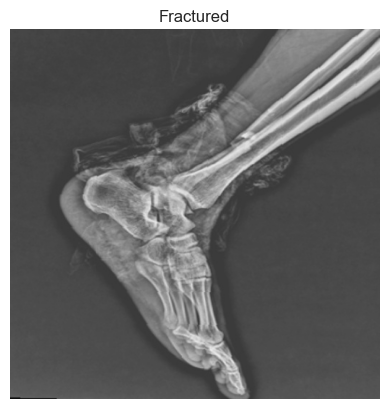

In [10]:
index = np.random.randint(len(X_train))
plt.imshow(X_train[index])
plt.title(classes[y_train[index]])
plt.axis('off')

In [11]:
X_train[index]

array([[[ 71,  71,  71],
        [ 71,  71,  71],
        [ 72,  72,  72],
        ...,
        [163, 163, 163],
        [157, 157, 157],
        [150, 150, 150]],

       [[ 70,  70,  70],
        [ 71,  71,  71],
        [ 71,  71,  71],
        ...,
        [157, 157, 157],
        [149, 149, 149],
        [143, 143, 143]],

       [[ 70,  70,  70],
        [ 70,  70,  70],
        [ 70,  70,  70],
        ...,
        [146, 146, 146],
        [139, 139, 139],
        [133, 133, 133]],

       ...,

       [[ 72,  72,  72],
        [ 73,  73,  73],
        [ 74,  74,  74],
        ...,
        [ 86,  86,  86],
        [ 87,  87,  87],
        [ 87,  87,  87]],

       [[ 11,  11,  11],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [ 87,  87,  87],
        [ 88,  88,  88],
        [ 88,  88,  88]],

       [[ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12],
        ...,
        [ 88,  88,  88],
        [ 88,  88,  88],
        [ 88,  88,  88]]

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(512, 512, 3)),
    tf.keras.layers.Resizing(128, 128),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(filters=8, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,697 (1.22 MB)

 Trainable params: 319,697 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_val, y_val),
    verbose=2
)

Epoch 1/10
233/233 - 19s - 80ms/step - accuracy: 0.7617 - loss: 0.4826 - val_accuracy: 0.8398 - val_loss: 0.3257
Epoch 2/10
233/233 - 11s - 46ms/step - accuracy: 0.8649 - loss: 0.2926 - val_accuracy: 0.9054 - val_loss: 0.2155
Epoch 3/10
233/233 - 10s - 44ms/step - accuracy: 0.9144 - loss: 0.2076 - val_accuracy: 0.9398 - val_loss: 0.1544
Epoch 4/10
233/233 - 10s - 42ms/step - accuracy: 0.9476 - loss: 0.1393 - val_accuracy: 0.9538 - val_loss: 0.1161
Epoch 5/10
233/233 - 10s - 41ms/step - accuracy: 0.9677 - loss: 0.0905 - val_accuracy: 0.9720 - val_loss: 0.0897
Epoch 6/10
233/233 - 10s - 42ms/step - accuracy: 0.9702 - loss: 0.0767 - val_accuracy: 0.9796 - val_loss: 0.0713
Epoch 7/10
233/233 - 10s - 42ms/step - accuracy: 0.9816 - loss: 0.0547 - val_accuracy: 0.9817 - val_loss: 0.0736
Epoch 8/10
233/233 - 10s - 42ms/step - accuracy: 0.9816 - loss: 0.0504 - val_accuracy: 0.9409 - val_loss: 0.2047
Epoch 9/10
233/233 - 10s - 41ms/step - accuracy: 0.9844 - loss: 0.0469 - val_accuracy: 0.9677 - 

In [15]:
model.evaluate(X_test, y_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9801 - loss: 0.0520


[0.05407204106450081, 0.9784946441650391]

In [16]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

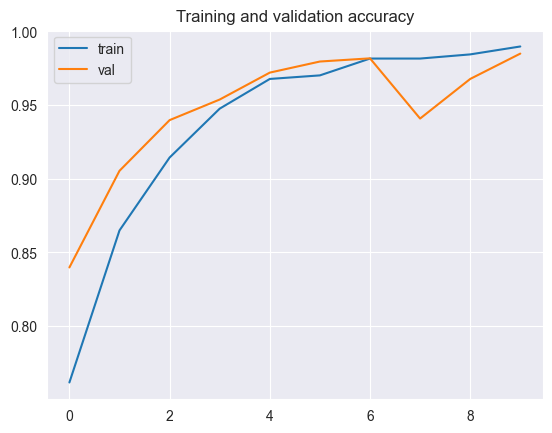

In [17]:
plt.plot(train_accuracy, label='train')
plt.plot(val_accuracy, label='val')
plt.title('Training and validation accuracy')
plt.legend()

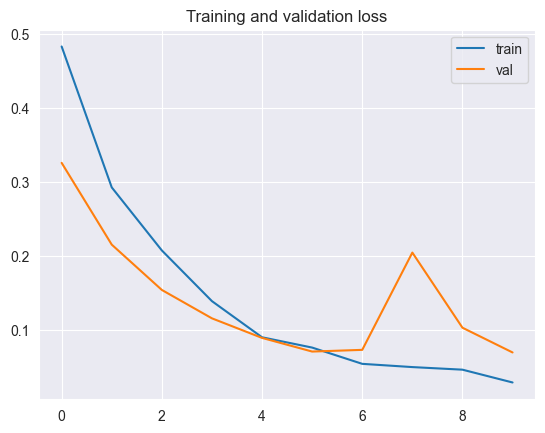

In [18]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.title('Training and validation loss')
plt.legend()

In [19]:
predictions = np.round(model.predict(X_test))

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


<Axes: >

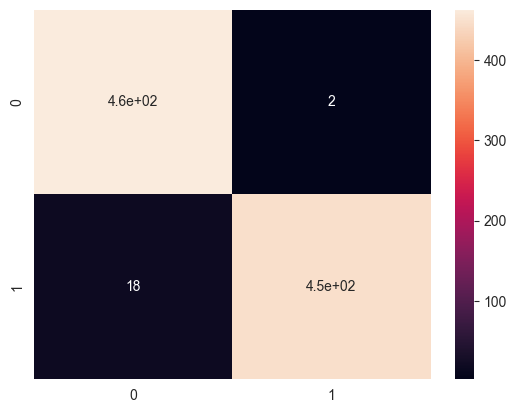

In [20]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       465
           1       1.00      0.96      0.98       465

    accuracy                           0.98       930
   macro avg       0.98      0.98      0.98       930
weighted avg       0.98      0.98      0.98       930



In [22]:
model.save('./../models/model.keras')